In [1]:
!pip install diffusers accelerate safetensors transformers torch --upgrade

  Attempting uninstall: safetensors
    Found existing installation: safetensors 0.5.2
    Uninstalling safetensors-0.5.2:
      Successfully uninstalled safetensors-0.5.2
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.4.0
    Uninstalling accelerate-1.4.0:
      Successfully uninstalled accelerate-1.4.0


In [2]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

AssertionError: Torch not compiled with CUDA enabled

In [3]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)

# Use MPS for Apple Silicon Macs
device = "mps" if torch.backends.mps.is_available() else "cpu"
pipe.to(device)

pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

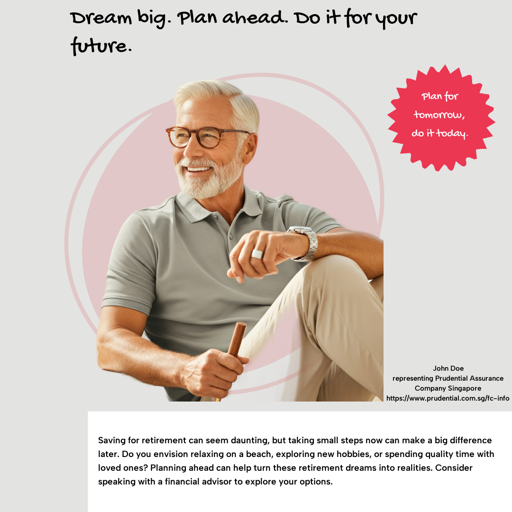

In [13]:
from PIL import Image
import requests
import random
#url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
#def download_image(url):
#    image = PIL.Image.open(requests.get(url, stream=True).raw)
#    image = PIL.ImageOps.exif_transpose(image)
image=Image.open("test.png")
image = image.convert("RGB")
image.thumbnail((512, 512))
#image = download_image(url)
image

  0%|          | 0/50 [00:00<?, ?it/s]

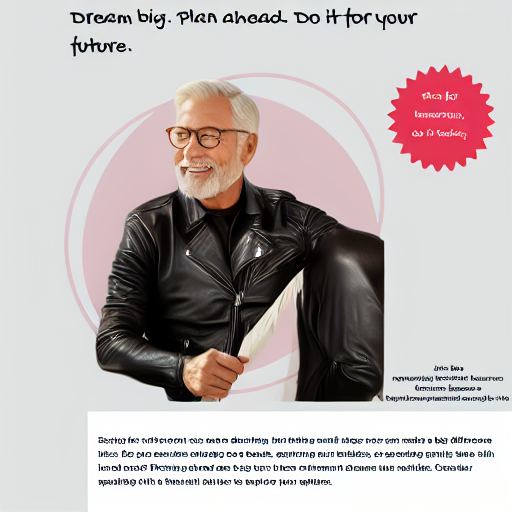

In [15]:
prompt = "add a leather jacket"
#images = pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1).images
text_cfg_scale=7.5
image_cfg_scale=1.5
seed = 1371
generator = torch.manual_seed(seed)
result_img = pipe(prompt, image=image, num_inference_steps=50,guidance_scale=text_cfg_scale,image_guidance_scale=image_cfg_scale,generator=generator).images[0]
result_img